Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Accuracy: 0.9938752783964365
Confusion Matrix:
 [[4307   23]
 [  32 4618]]


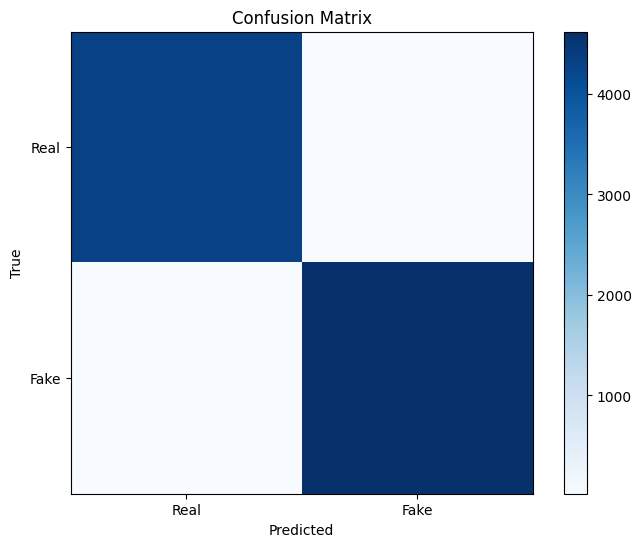

Accuracy: 0.9938752783964365
Confusion Matrix:
 [[4307   23]
 [  32 4618]]


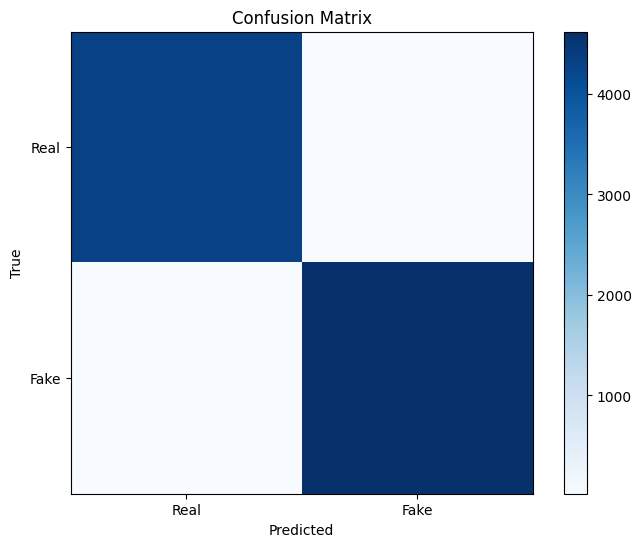

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


!pip install pandas
!pip install scikit-learn


real_news_df = pd.read_csv('/content/True.csv')
fake_news_df = pd.read_csv('/content/Fake.csv')


X = np.concatenate((real_news_df['text'], fake_news_df['text']))
y = np.concatenate((np.zeros(len(real_news_df)), np.ones(len(fake_news_df))))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfidf_train, y_train)


y_pred = classifier.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Real', 'Fake'])
plt.yticks(tick_marks, ['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Real', 'Fake'])
plt.yticks(tick_marks, ['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



